In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

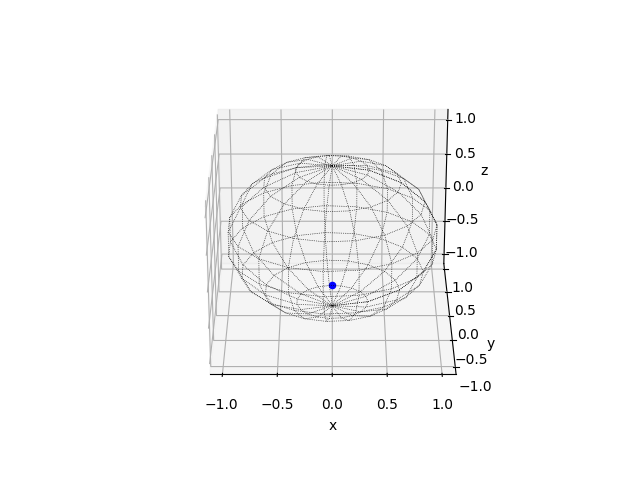

4.71238898038469 1.5707963267948966


interactive(children=(FloatSlider(value=4.71238898038469, description='theta', max=9.42477796076938, min=-9.42…

In [7]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


def spherical_to_cartesian(theta, phi):
    x = np.cos(theta) * np.sin(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(phi)
    return x, y, z

# sphere wireframe black dotted
theta, phi = np.linspace(0, 2 * np.pi, 20), np.linspace(0, np.pi, 10)
theta, phi = np.meshgrid(theta, phi)
x, y, z = spherical_to_cartesian(theta, phi)
sphere_plot = ax.plot_wireframe(x, y, z, color="k", linestyle=":", linewidth=0.5)
# ax.axis("off")
# add labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# view straight from the y axis
ax.view_init(26, 270)

# Plot a random point on the surface of the sphere
theta_init = 6 * np.pi / 4
phi_init = np.pi / 2
x, y, z = spherical_to_cartesian(theta_init, phi_init)
point_scatter = ax.scatter(x[None], y[None], z[None], color="b")

plt.show()

@widgets.interact(
    theta=widgets.FloatSlider(min=-3 * np.pi, max=3 * np.pi, step=0.1, value= theta_init),
    phi=widgets.FloatSlider(min=-2 * np.pi, max=2 * np.pi, step=0.1, value= phi_init)
)
def animate(theta, phi):
    x, y, z = spherical_to_cartesian(theta, phi)
    point_scatter._offsets3d = (x[None], y[None], z[None])
    ax.draw_artist(point_scatter)